## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

**Импортируем библиотеки, необходимые для работы**

In [280]:
import pandas as pd
import matplotlib.pyplot as plt

**Откроем файлы и сохраним в переменные mkrf_movies, mkrf_shows**

In [281]:
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv', sep = ',')

In [282]:
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv', sep = ',')

**Общая информация и тип данных в датафрейме**

In [283]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [284]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


**Вывод по методу.info():**<br>
Предварительная проверка общей информации по двум датафреймам показывает, что по столбцу "puNumber" датафрейма "mkrf_shows", который будет использоваться для объединения датафреймов, различаются типы данных: в первом случае это object, во втором - int64. <br>


**Изменим тип данных в первом датафрейме на int64.**

In [285]:
try:
    mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')
except:
    print('Dtype change failed')

Dtype change failed


Преобразование не удалось, т.к. в столбце есть данные, не соотвествующие необходимому типу. Найдем данные позиции в столбце.

In [286]:
mkrf_movies[~mkrf_movies['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Вероятно в строке 804 столбца puNumber допущены ненужные пробелы. Удалим их и заменим значение "нет" строки 1797 на "0".

In [287]:
mkrf_movies.loc[804, 'puNumber'] = mkrf_movies.loc[804, 'puNumber'].strip()
mkrf_movies.loc[1797, 'puNumber'] = '0'

In [288]:
try:
    mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')
except:
    print('Dtype change failed')

**Вывод по смене типов данных:**<br>
Смена типа данных в столбце puNumber прошла успешно. Можно объединить датафреймы в новый датафрейм mkrf_movies_final. <br>
Слева должен отобразиться столбец box_office из датафрейма mkrf_shows.

**Объединим датафреймы**<br>

In [289]:
mkrf_movies_final = mkrf_movies.merge(mkrf_shows, how='left')

In [290]:
mkrf_movies_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### Шаг 2. Предобработка данных

**Требуют исправления данные в следующих столбцах:** <br>
* show_start_date - корректный тип данных datetime <br>
* ratings - корректный тип данных float64

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [291]:
mkrf_movies_final.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


**Исправим типы данных в необходимых стобцах:**

In [292]:
mkrf_movies_final['show_start_date'] = pd.to_datetime(mkrf_movies_final['show_start_date'],
                                                      format='%Y-%m-%dT%H:%M:%S')

In [293]:
mkrf_movies_final.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


**Изучим содержание столбца ratings**

In [294]:
mkrf_movies_final['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Некоторые значения рейтинга записаны как %. Исходя из того, что рейтинг в основном оценивается по 10ти бальной шкале, разделим данные значения на 10 и изменим тип данных на float.

In [295]:
mkrf_movies_final['ratings'] = mkrf_movies_final['ratings'].str.replace('%', '').astype('float')

In [296]:
mkrf_movies_final.loc[mkrf_movies_final['ratings'] > 10, 'ratings'] = mkrf_movies_final.loc[mkrf_movies_final['ratings']
                                                                                            > 10, 'ratings'] / 10

In [297]:
mkrf_movies_final['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

**Выведем количество пропусков по столбцам**

In [298]:
mkrf_movies_final.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

**Выведем процент пропусков**

In [299]:
pd.DataFrame(round(mkrf_movies_final.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.200000
production_country,0.000000
director,0.100000
producer,7.600000
age_restriction,0.000000
refundable_support,95.600000


Вывод:  
96% всех пропусков приходится на фильмы с государственной поддержкой, также наблюдается 58% пропусков по данным о размерах сборов по фильму. <br>
Учитывая объем пропусков, их удаление строк с данными пропусками может исказить результаты анализа.

**Для изучения текущих трендов заполним пропуски genres, financing_source.**

In [300]:
mkrf_movies_final['genres'].value_counts()

драма                        476
комедия                      352
мелодрама,комедия            222
драма,мелодрама,комедия      189
драма,мелодрама              183
                            ... 
детектив,криминал,боевик       1
детектив,боевик,история        1
ужасы,фэнтези,приключения      1
драма,семейный,комедия         1
мелодрама,драма,фэнтези        1
Name: genres, Length: 742, dtype: int64

In [301]:
mkrf_movies_final['genres'] = mkrf_movies_final['genres'].fillna(value='')

In [302]:
#mkrf_movies_final['ratings'] = mkrf_movies_final['ratings'].fillna(mkrf_movies_final['ratings'].median())

In [303]:
mkrf_movies_final['financing_source'] = mkrf_movies_final['financing_source'].fillna(value='')

In [304]:
mkrf_movies_final.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source            0
ratings                   967
genres                      0
box_office               4328
dtype: int64

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [305]:
duplicate_Rows = mkrf_movies_final[mkrf_movies_final.duplicated()]
duplicate_Rows

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Явных дубликатов не обнаружено.

In [306]:
mkrf_movies_final.nunique()

title                    6772
puNumber                 7484
show_start_date          1965
type                        8
film_studio              5490
production_country        950
director                 4811
producer                 5349
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            4
ratings                    84
genres                    743
box_office               2938
dtype: int64

По условию, у одного фильма может быть несколько прокатных удостоверений, соответственно дубликаты в столбцах title и puNumber не являются аномальными, как и в остальных столбцах. Оставим данные без изменений.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [307]:
for i in ['type', 'production_country', 'age_restriction', 'financing_source', 'genres']:
    print('Столбец', i)
    print(mkrf_movies_final[i].unique())

Столбец type
['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']
Столбец production_country
['США' 'СССР' 'Франция' 'СССР, Венгрия' 'Германия-Великобритания'
 'Великобритания - Италия' 'Чехословакия' 'США - Франция - Турция'
 'Новая Зеландия' 'Канада - Франция - Испания' 'США-Германия'
 'США - Великобритания' 'Великобритания' 'США - Германия'
 'Франция - Мексика - США' 'Россия, Казахстан, США' 'СССР, Швеция'
 'СССР, Франция, Англия, Куба, ГДР' 'Германия'
 'Великобритания-США-Германия-КНР' 'СССР, ЧССР, Западный Берлин, ПНР'
 'СССР, Италия' 'Гонконг, КНР' 'США - Франция'
 'США - Япония - Франция - Великобритания'
 'Гонконг - Сингапур - Таиланд - Великобритания' 'США-Канада'
 'Франция - Италия - Великобритания - США' 'Франция - США'
 'Ирландия-Великобритания-Германия' 'Чехия' 'США-Австралия'
 'СССР, Финляндия' 'США-Франция-Великобритания-Австрия' 'США - Бельгия'
 'США - Ирландия - Великобритания' 

Вывод:  
В почти всех столбцах с категорийными данными встречаются лишние пробелы, либо информация указана через запятую без пробелов. По столбцам production_country и genres несколько значений указаны в одной строке. При необходимости их можно упорядочить.

**Исправим проблемные значения в поле type**

In [308]:
mkrf_movies_final['type'] = mkrf_movies_final['type'].str.strip()
mkrf_movies_final['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Столбец budget включает полный объем государственной поддержки, соответственно, данный столбец всегда должен быть заполенен при наличии значения хотя бы в одном из столбцов refundable_support или nonrefundable_support. Проверим данную гипотезу.

In [309]:
budget_check_up = mkrf_movies_final[mkrf_movies_final['budget'] < 
                                    (mkrf_movies_final['refundable_support'] + 
                                     mkrf_movies_final['nonrefundable_support'])]
budget_check_up

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


Есть аномальные пропуски в столбце с бюджетом по фильмам с государственной поддержкой, которые нужно заполнить.<br>
Вычислим медианный % государственной поддержки в общем бюджете фильмов с поддержкой и заполним пропущенные значения по столбцу budget.

In [310]:
mkrf_movies_final['support_ratio'] = ((mkrf_movies_final['refundable_support'] +
                                      mkrf_movies_final['nonrefundable_support']) / mkrf_movies_final['budget']) * 100
support_ratio = mkrf_movies_final['support_ratio'].median()
print('Медианная доля государственной поддержки в бюджете составляет', support_ratio)

Медианная доля государственной поддержки в бюджете составляет 61.40376284219444


In [311]:
mkrf_movies_final.loc[budget_check_up.index, 'budget'] = mkrf_movies_final.loc[budget_check_up.index, 'refundable_support']+mkrf_movies_final.loc[budget_check_up.index,'nonrefundable_support']
mkrf_movies_final.loc[budget_check_up.index]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_ratio
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,23000000.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07,inf
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,75000000.0,Фонд кино,6.6,драма,4.461635e+08,inf
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,80000000.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08,inf
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,20000000.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07,inf
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,160000000.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08,inf
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,59000000.0,Фонд кино,6.3,"комедия,драма",1.957739e+06,inf
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,35000000.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07,inf
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,6000000.0,Министерство культуры,4.3,комедия,1.536293e+07,inf
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,70000000.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07,inf
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,250000000.0,Фонд кино,5.6,фантастика,1.038321e+09,inf


#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [312]:
mkrf_movies_final['year_of_publication'] = mkrf_movies_final['show_start_date'].dt.year

In [313]:
mkrf_movies_final.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_ratio,year_of_publication
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,,7.2,"боевик,драма,мелодрама",NaN,NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,,6.6,"драма,военный",NaN,NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,,6.8,"фантастика,боевик,триллер",NaN,NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,,6.8,"фантастика,боевик,триллер",NaN,NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,,6.8,"фантастика,боевик,триллер",NaN,NaN,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [314]:
def add_column(mkrf_movies_final, columns):
    for column in columns:
        mkrf_movies_final[f'main_{column}'] = mkrf_movies_final[column].dropna().apply(lambda x: x.split(',')[0])
    return mkrf_movies_final

In [315]:
mkrf_movies_final = add_column(mkrf_movies_final, ['director', 'genres'])

In [316]:
mkrf_movies_final.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_ratio,year_of_publication,main_director,main_genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,,7.2,"боевик,драма,мелодрама",NaN,NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,,6.6,"драма,военный",NaN,NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,,6.8,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,,6.8,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,,6.8,"фантастика,боевик,триллер",NaN,NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

См. выше, п.2.5

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

**Создадим сводную таблицу по количеству фильмов в прокате по годам**

In [317]:
mkrf_movies_final_pivot = mkrf_movies_final.loc[mkrf_movies_final['box_office'] != '0']
mkrf_movies_final_pivot = mkrf_movies_final_pivot.pivot_table(index = 'year_of_publication',
                                                              values = 'box_office',
                                                              aggfunc=['count', 'sum', 'mean', 'median'])

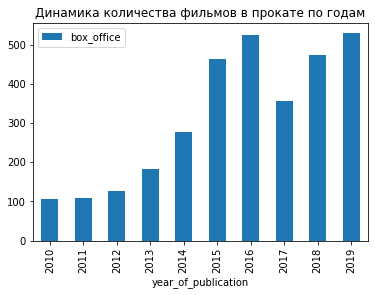

In [318]:
(
    mkrf_movies_final_pivot
    .plot(title='Динамика количества фильмов в прокате по годам', kind='bar', y = 'count')
)
plt.show()

Максимальное количество фильмов находилось в прокате в 2016 и 2019 годах.

**Посчитаем долю фильмов с указанной информацией о прокате в кинотеатрах.**

In [319]:
print(f'Доля фильмов с указанием информации о сборах: {mkrf_movies_final.box_office.notna().mean()*100:.2f}')

Доля фильмов с указанием информации о сборах: 42.19


- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

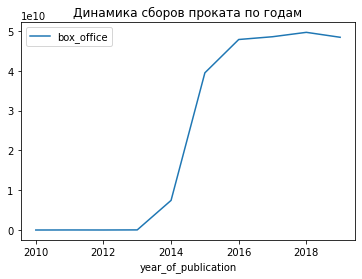

In [320]:
mkrf_movies_final_pivot.plot(title='Динамика сборов проката по годам', kind='line', y='sum');

Вывод:  
На протяжении девяти лет наблюдается положительная динамика роста сборов. Минимальное значение находится на уровне 2010-2012 годов, максимальное - в 2018м.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

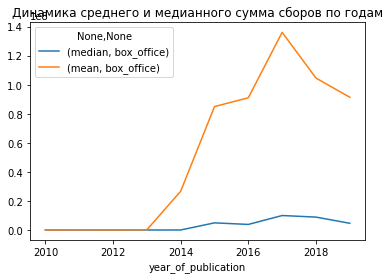

In [321]:
mkrf_movies_final_pivot.plot(title='Динамика среднего и медианного сумма сборов по годам',
                             kind='line',
                             y=['median', 'mean']);

Вывод:  
В среднем наибольшее количество сборов пришлось на 2017й год. Медианное значение также растет к 2017 году, затем снижается.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

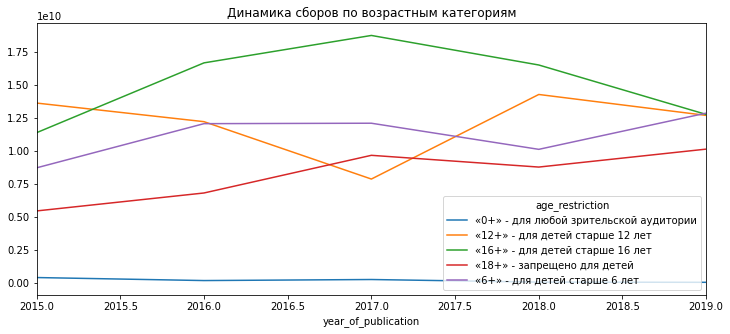

In [322]:
mkrf_movies_final[mkrf_movies_final['box_office'].notna()] \
    .pivot_table(index='year_of_publication',
                columns='age_restriction',
                values='box_office',
                aggfunc='sum') \
    .plot(title='Динамика сборов по возрастным категориям', kind='line', figsize = (12, 5), xlim=[2015, 2019])
print()

Вывод:  
График показывает, что наибольшая доля кассовых сборов приходится на категорию "16+". Посещение кинотеатра является относительно недорогим развленчением, поэтому популярно среди студентов, у которых также имеется в среднем больше свободного времени на досуг, чем у более старших категорий.<br>
Категория фильмов "0+" не приносит дохода кинотеатрам, т.к. семьи с маленькими детьми предпочитаю смотреть фильмы дома.<br>
В 2017 году наблюдает падение уровня сборов по категории "12+". Возмодно это связано с демограмической ситуацией в стране в 2005 году (на сайте https://www.fedstat.ru/ наблюдается падение численности населения в этот период). <br>

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

**Добавим в таблицу столбец total_support - общая сумма государственной поддержки**

In [323]:
mkrf_movies_final['total_support'] = mkrf_movies_final['refundable_support'] + mkrf_movies_final['nonrefundable_support']

**Выделим в отдельную таблицу фильмы с поддержкой**

In [324]:
mkrf_movies_final['profitability'] = mkrf_movies_final['box_office'] / mkrf_movies_final['total_support'] - 1

**Отметим отдельно рентабельные и нерентабельные фильмы**

In [325]:
mkrf_movies_final['good_profitability'] = mkrf_movies_final['profitability'] > 0
mkrf_movies_final['bad_profitability'] = ~mkrf_movies_final['good_profitability']

**Выделим в отдельную таблицу фильмы с поддержкой**

In [326]:
movies_supported = mkrf_movies_final[mkrf_movies_final['refundable_support'].notna() | mkrf_movies_final['nonrefundable_support'].notna()]
pd.set_option('max_columns', None)

**Изучим самые популярные жанры**

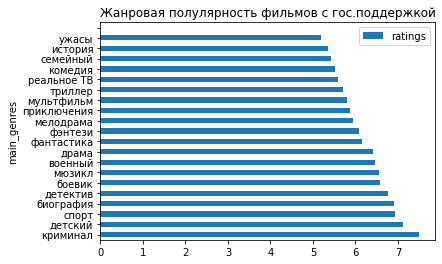

In [327]:
movies_supported[['main_genres', 'ratings']].groupby('main_genres') \
                                        .agg('mean') \
                                        .sort_values(by='ratings', ascending=False) \
                                        .plot(title='Жанровая полулярность фильмов с гос.поддержкой', kind='barh');

Вывод:  
Наиболее популярными фильмами с гос.поддержкой являются фильмы жанра криминальный, детский, спорт. Наименее популярны ужасы.

**Изучим направленность государственной поддержки фильмов**

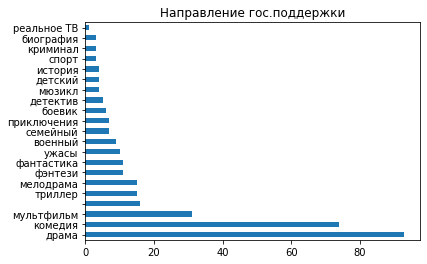

In [328]:
movies_supported['main_genres'].value_counts().plot(title='Направление гос.поддержки', kind='barh');

Вывод:  
Государство стремится поддерживать фильмы жанра драма, комедия и мультфильмы. В противоречие с рейтингами популярности, на криминал и спорт отводится наименьшее количество гос.помощи.

**Изучим рентабельность фильмов с гос.поддержкой**

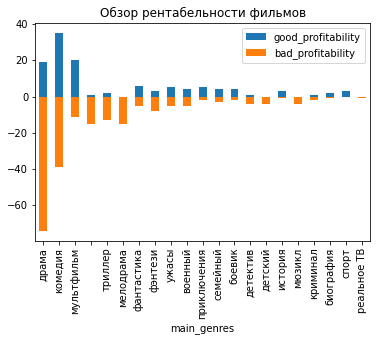

In [329]:
movies_supported.groupby('main_genres') \
            .agg({'title': 'count',
                  'good_profitability': 'sum',
                  'bad_profitability': lambda x: 0 - x.sum()}) \
            .sort_values(by='title',
                         ascending=False) \
            .plot(title='Обзор рентабельности фильмов',
                  kind='bar',
                  stacked=True,
                  y=['good_profitability', 'bad_profitability']);

Вывод:  
График показывает, что несмотря на значительный объем гос.поддержки драмм, их прокат не окупается.<br>
Процент окупившихся комедий приблизительно равен проценту провалившихся в прокате фильмов данного жанра. <br>
Мультфильмы окупаются на приблизительно на 2/3.<br>
Стоит обратить внимание, что по мелодраммам и мюзилам вложения оказались абсолютно нерентабельными.

### Шаг 5. Напишите общий вывод

**Краткий обзор проведённой работы**    
На основании данных о рынке российского проката проанализировали текущие тренды среди интересов зрителей, а также рассмотрели отдельно вопрос рентабельности фильмов с государственной поддержкой.
  
**Главные выводы**  
1. Анализ данных показал, что источник относится недостаточно скурупулезно к их сбору.<br>
2. В датафреме было много пропусков, нет четкого алгоритма формирования данных, о чем свидетельствуют лишние пробелы, разные форматы написания жанра, рейтинга и имени режиссера также усложняют процесс анализа.<br>
3. На результаты анализа также могли существенно повлиять пропуски данных по размеру сборов по фильмам.<br>
4. Тенденции развития киноиндустрии показали, что количество фильмов, выпущенных в прокат к 2019му году растет, но сборы при этом за аналогичный период времени падают. Очевидно, повлияла ситация с пандемией в России. <br> 
5. Обзор аудитории по категории фильма показал, что большую часть зрителей составляют студенты, дети после 12ти. Соответственно, закономерно то, что фильмы жанра "драма" интересны данной категории зрителей не так сильно, как комедии, мультфильмы, приключения, боевики. Как показывает график, драмы не окупаются.
6. Анализ окупаемости фильмов показал, что у органов распределения бюджета на финансирование киноиндустрии и непосредственно зрителей наблюдается частично противоположная направленность интересов. Об этом свидетествуют различия в пиковых показателях окупаемости и рейтингов. <br>
**Рекомендации**
1. Зрители голосуют рейтингами и сборами, соотвественно, если существует цель повысить рентабельность фильмов с гос. поддерржкой, следует уделить особое внимание улучшению сбора данных в этой области.   
2. Возможно, стоит также пересмотреть структуру гос.финансирования в киноиндустрии, направив средства на более популярные жанры фильмов.